## Concept of Earthquake Early Warning (EEW)

I have been working on Earthquake Early Warning for more than 7 years now. But I realize that I never talked here about earthquake early warning system in my blog. Therefore, I will give a brief introduction of earthquake early warning system here today, and show you how to calculate the alert time. 

The fundamental idea behind earthquake early warning system is: **Electronic signal travels much faster than seismic waves**. It is essentially light speed vs sound speed, therefore, we usually first see the lightning before we hear the sound, the time difference is the warning time. 

![png](http://4.bp.blogspot.com/-1BrO3YJvF-M/TdKoWVWG1oI/AAAAAAAAAE0/tG5Ht8vl5sg/s1600/Lightning+and+thunder.png)

When earthquake occurs, usually it generates two types of waves - p and s waves. P wave (Primary or Pressure wave) travels at about 6 km/s with usually small amount of energy, while S wave (Secondary or Shear wave) travels at about 3 km/s with a large amount of energy. The s wave usually causing a lot of damage during the earthquake, therefore, scientists thought, if we can detect the p wave fast, then we can issue an earthquake early warning to places that s wave hasn't arrived yet by taking advantage of the light speed of the electronic signal. Let's see a very nice explanation of the EEW from MSNBC's Rachel Maddow:

In [1]:
from IPython.display import HTML

# Youtube
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/SuQflIZ7zWM" frameborder="0" allowfullscreen></iframe>')

In the following, I will generate two figures to illustrate how to estimate the EEW alert time using an example of M6.0 Napa earthquake in 2014. Note that: This is just a demo to show how to calculate the warning time from the earthquake early warning system. The numbers showing in the following example is not exactly the same from the real performance of the system in the earthquake. In this example, we can specify 3 different velocity models which will give you slightly different results in terms of the warning. I will just show the figure and if you want to know how it is calculated, please find all the code from [Qingkai's Github](https://github.com/qingkaikong/blog/tree/master/2017_23_EEW). 

In [2]:
# load all the functions
from warning_relationships import *

%matplotlib inline

## Configuration

Change the location of the earthquake, origin time, alert sent out time and your location. Then you can run the two functions below to plot the warning time on a figure or on a map. Showing here is an example of 2014 M6.0 Napa earthquake in CA. I put the user location at Berkeley. 

In [3]:
evla = 38.2155   #earthquake latitude
evlo = -122.3117  #earthquake longitude
evdp = 11.25  # earthquake depth in km
mag = 6.0  #earthquake magitude

#event origin time
evt0 = UTCDateTime("2014-08-24T10:20:44.000")

#alert time from EEW (when the EEW system send out the alert)
alertT = UTCDateTime("2014-08-24T10:20:49.100")

#Your location
user_lat = 37.87
user_lon = -122.26

## Plot the warning time

This can show the p and s phase arrival time from 3 different models ((1) iasp91, (2) ak135, (3) common, and also the alert time. The common model is just simply assume the P wave velocity as 6.1 km/s and the S wave speed as 3.55 km/s. You can disable P travel time curve, S travel time curve or alert time line by setting them to False. you can choose plot without the city labels by setting the 'show_city' as False. If you choose to plot out the cities, then you need to specify a dictionary with city names as the key, and value is a tuple of latitude, longitude text relative to the s wave arrival in x direction, text relative to the s wave arrival in y direction. For Example:
```
'BSL':(37.87, -122.26, -30, 1.1)
'Name':(lat,   lon,     dx,  dy)
```
dx and dy controls where you plot the text of the cities and the corresponding arrow

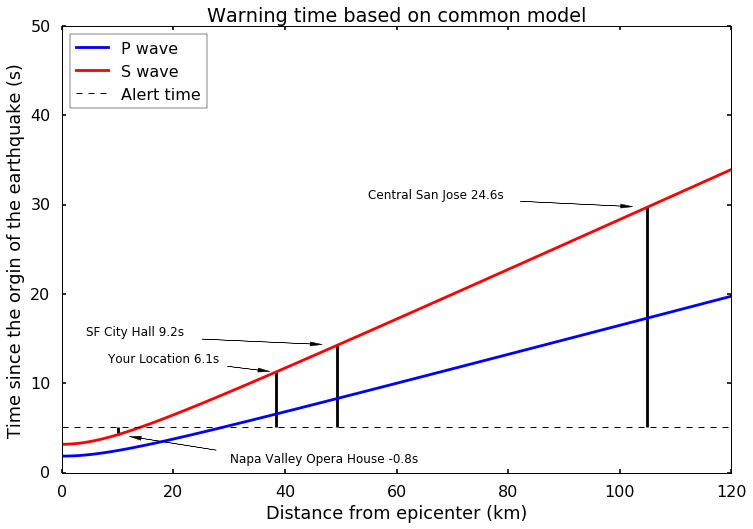

In [4]:
cities = {
          'Napa Valley Opera House':(38.29950, -122.28568, 20, -3.1), 
          'Your Location':(user_lat, user_lon, -30, 1.1), 
          'SF City Hall':(37.7792, -122.4191, -45, 1.1),
          'Central San Jose':(37.3333, -121.9000, -50, 1.1),
          }
plot_P_and_S(evla, evlo, evdp, evt0, alertT, cities, max_dist = 120, max_T = 50, show_city=True
             , showP = True, showAlertT = True, model = 'common',show_title = True)

**Figure Description**: This figure showing p and s waves from the M6.0 Napa earthquake in 2014. Distance from the epicenter is showing on the x-axis and the time since the origin of the earthquake is showing on the y-axis. P and s waves are shown as blue and red lines. A dotted line is showing the time of the earthquake alert sending out. Cities specified by the user will be plotted on the figure too, with a thick black line indicate the time from the alert to the time of the s wave arrive, this is the warning time. In this case, Napa Valley Opera House didn't get a warning because it is close to the epicenter and the warning sent out after the s wave arrives at this location.

## Plot warning time on map

This can plot the warning time as circles on the map. We can also plot some cities as well by seeting show_cities to True. Besides, we can show the blind zone (places not getting alert) as a red circle. We can calculate the alert time based on 3 different models ((1) iasp91, (2) ak135, (3) common, and also the alert time. The common model is just simply assume the P wave velocity as 6.1 km/s and the S wave speed as 3.55 km/s. Cities are stored as dictionary, see the above section for the explain. 

Note: If you want to quickly plot the map, change show_counties = False, and resolution = 'l'

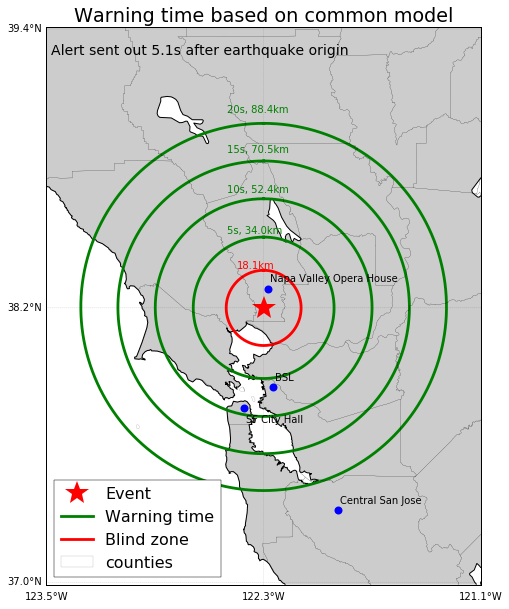

In [5]:
cities = {
          'Napa Valley Opera House':(38.29950, -122.28568, 0.01, 0.03), 
          'BSL':(37.87, -122.26, 0.01, 0.03), 
          'SF City Hall':(37.7792, -122.4191, 0.01, -0.06),
          'Central San Jose':(37.3333, -121.9000, 0.01, 0.03),
          }

plot_warningTime_on_map(evla, evlo, evdp, evt0, alertT, map_range = 1.2, cities = cities, show_cities = True, 
                            figsize = (10,10), resolution = 'h', pretty = False, show_distance_label = True, 
                            show_counties = True, show_blind_zone = True, show_legend= True, model = 'common',
                            show_title = True)


**Figure Description**: This figure showing alert time from the M6.0 Napa earthquake in 2014 on a map. Red star is the location of the earthquake. Blue dots are the cities specified by the user. The red circle is the blind zone where inside this zone, there will be no alert. 5s, 10s, 15s, and 20s warning zone is plotted on the map by the green circles. 